In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from google.colab import files


uploaded = files.upload()

Saving Titanic-Dataset.csv to Titanic-Dataset.csv


In [4]:
df_data = pd.read_csv('/content/Titanic-Dataset.csv')

In [5]:
df_data.shape

(891, 12)

In [6]:
df_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
df_data.columns.tolist()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

Column names and their details:

*   Survived: Outcome of survival (0 = No; 1 = Yes)
*   Pclass: Socio-economic class (1 = Upper class; 2 = Middle class; 3 = Lower class)
*   Name: Name of passenger
*   Sex: Sex of the passenger
*   Age: Age of the passenger (Some entries contain NaN)
*   SibSp: Number of siblings and spouses of the passenger aboard
*   Parch: Number of parents and children of the passenger aboard
*   Ticket: Ticket number of the passenger
*   Cabin: Cabin number of the passenger (Some entries contain NaN)
*   Embarked: Port of embarkation of the passenger (C = Cherbourg; Q = Queenstown; S = Southampton)

# Exploratory Data Analysis (EDA)

In [10]:
df_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
Survived=df_data['Survived'].value_counts().reset_index()
Survived

,Survived,count
0,0,549
1,1,342


Visulize to better understand the data.

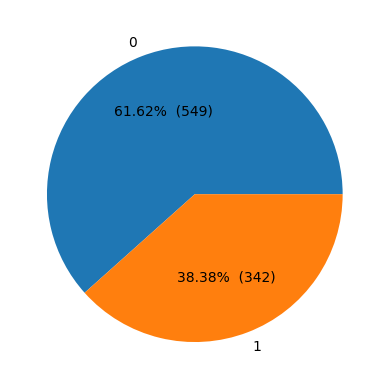

In [12]:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

plt.pie(Survived['count'], labels=Survived['Survived'], autopct=make_autopct(Survived['count']))
plt.show()

The not survival Percentage is 61.62%, which is lower than the survival

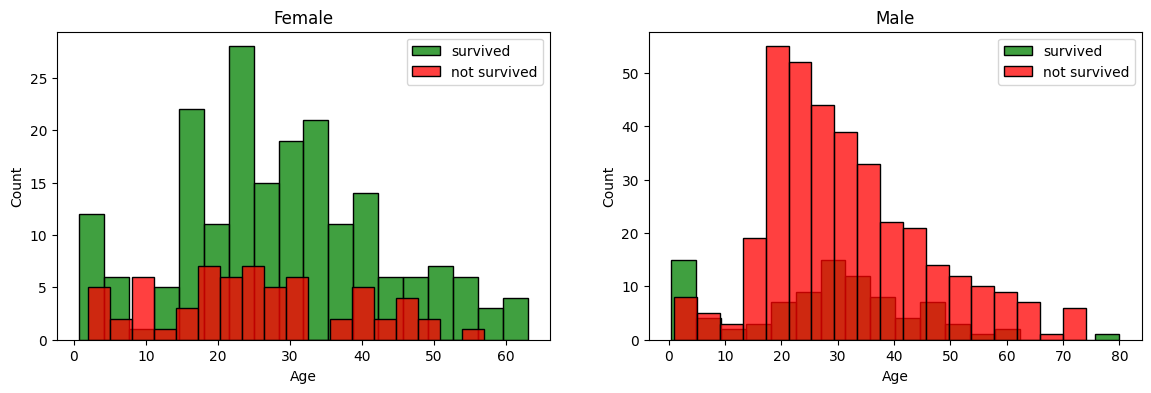

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))
woman = df_data[df_data['Sex'] == 'female']
men = df_data[df_data['Sex'] == 'male']

ax = sns.histplot(data=woman[woman['Survived'] == 1], x="Age", bins=18, label=survived, ax=axes[0], kde=False, color="green")
ax = sns.histplot(data=woman[woman['Survived'] == 0], x="Age", bins=18, label=not_survived, ax=axes[0], kde=False, color="red")
ax.set_title('Female')

ax = sns.histplot(data=men[men['Survived'] == 1], x="Age", bins=18, label=survived, ax=axes[1], kde=False, color="green")
ax = sns.histplot(data=men[men['Survived'] == 0], x="Age", bins=18, label=not_survived, ax=axes[1], kde=False, color="red")
ax.set_title('Male')

# Add the legend
axes[0].legend()
axes[1].legend()

plt.show()

When we look into the histogram with compare to surivial age of male and female,


*   Female Survived in all the ages compare to male very low persons are survieved in all the ages.
*   Higher survived between 25 to 35 age but compare to male very low in same age category.
*   Compare to all the ages in male, the high survival rate in age between 0 to 5.
*   The Total survived in female is 233, male is 109 which is 1/3.
*   men have a high probability of survival when they are between 18 and 30 years old





In [14]:
df_data.groupby(['Sex','Survived']).size()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
dtype: int64

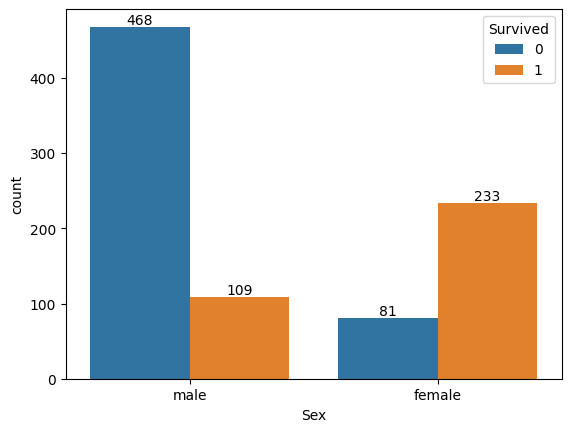

In [15]:
ax=sns.countplot(x ='Sex', hue = "Survived", data = df_data)
for container in ax.containers:
    ax.bar_label(container)

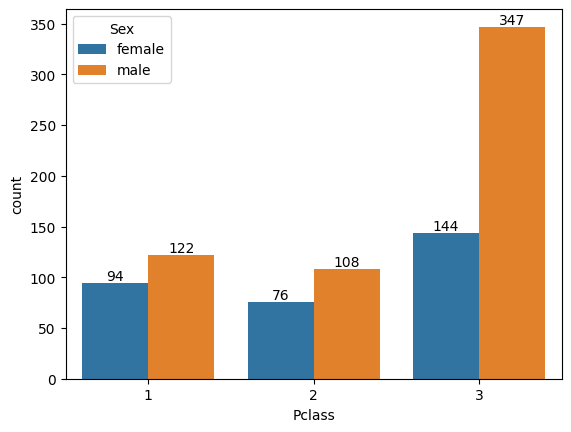

In [16]:
ax=sns.countplot(x='Pclass', hue='Sex', data=df_data)
for container in ax.containers:
    ax.bar_label(container)

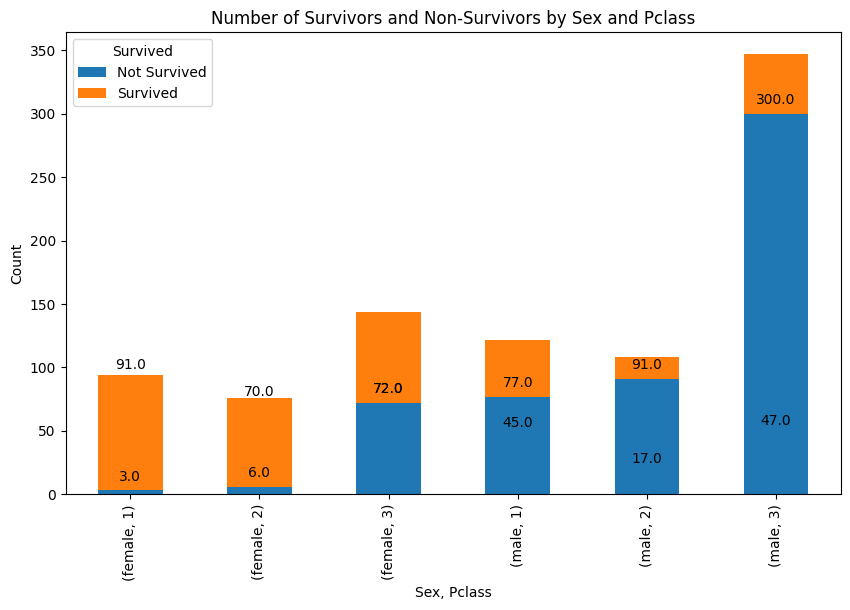

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group the data by 'Sex', 'Pclass', and 'Survived', and then count the number of occurrences
survival_counts = df_data.groupby(['Sex', 'Pclass', 'Survived']).size().unstack()

# Plot the data
ax = survival_counts.plot(kind='bar', stacked=True, figsize=(10, 6))

# Add count labels on top of each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.xlabel('Sex, Pclass')
plt.ylabel('Count')
plt.title('Number of Survivors and Non-Survivors by Sex and Pclass')
plt.legend(title='Survived', labels=['Not Survived', 'Survived'])
plt.show()


In the Pclass: Socio-economic class , 1st class female survival is higher compared to  male first class. In the level 3 female survial is equal to survival and not survival, but in male

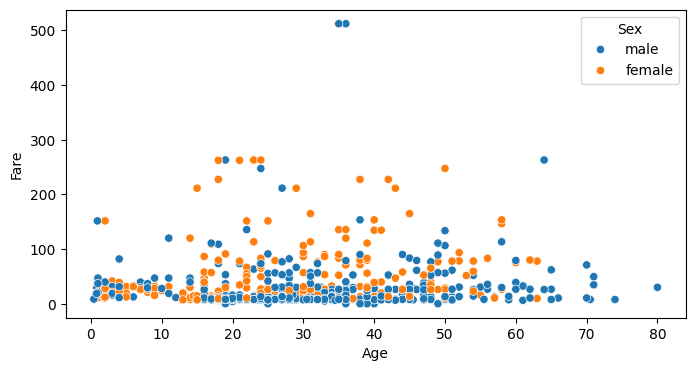

In [18]:
plt.figure(figsize=(8,4))
sns.scatterplot(x="Age", y="Fare", hue="Sex", data=df_data)
plt.show()

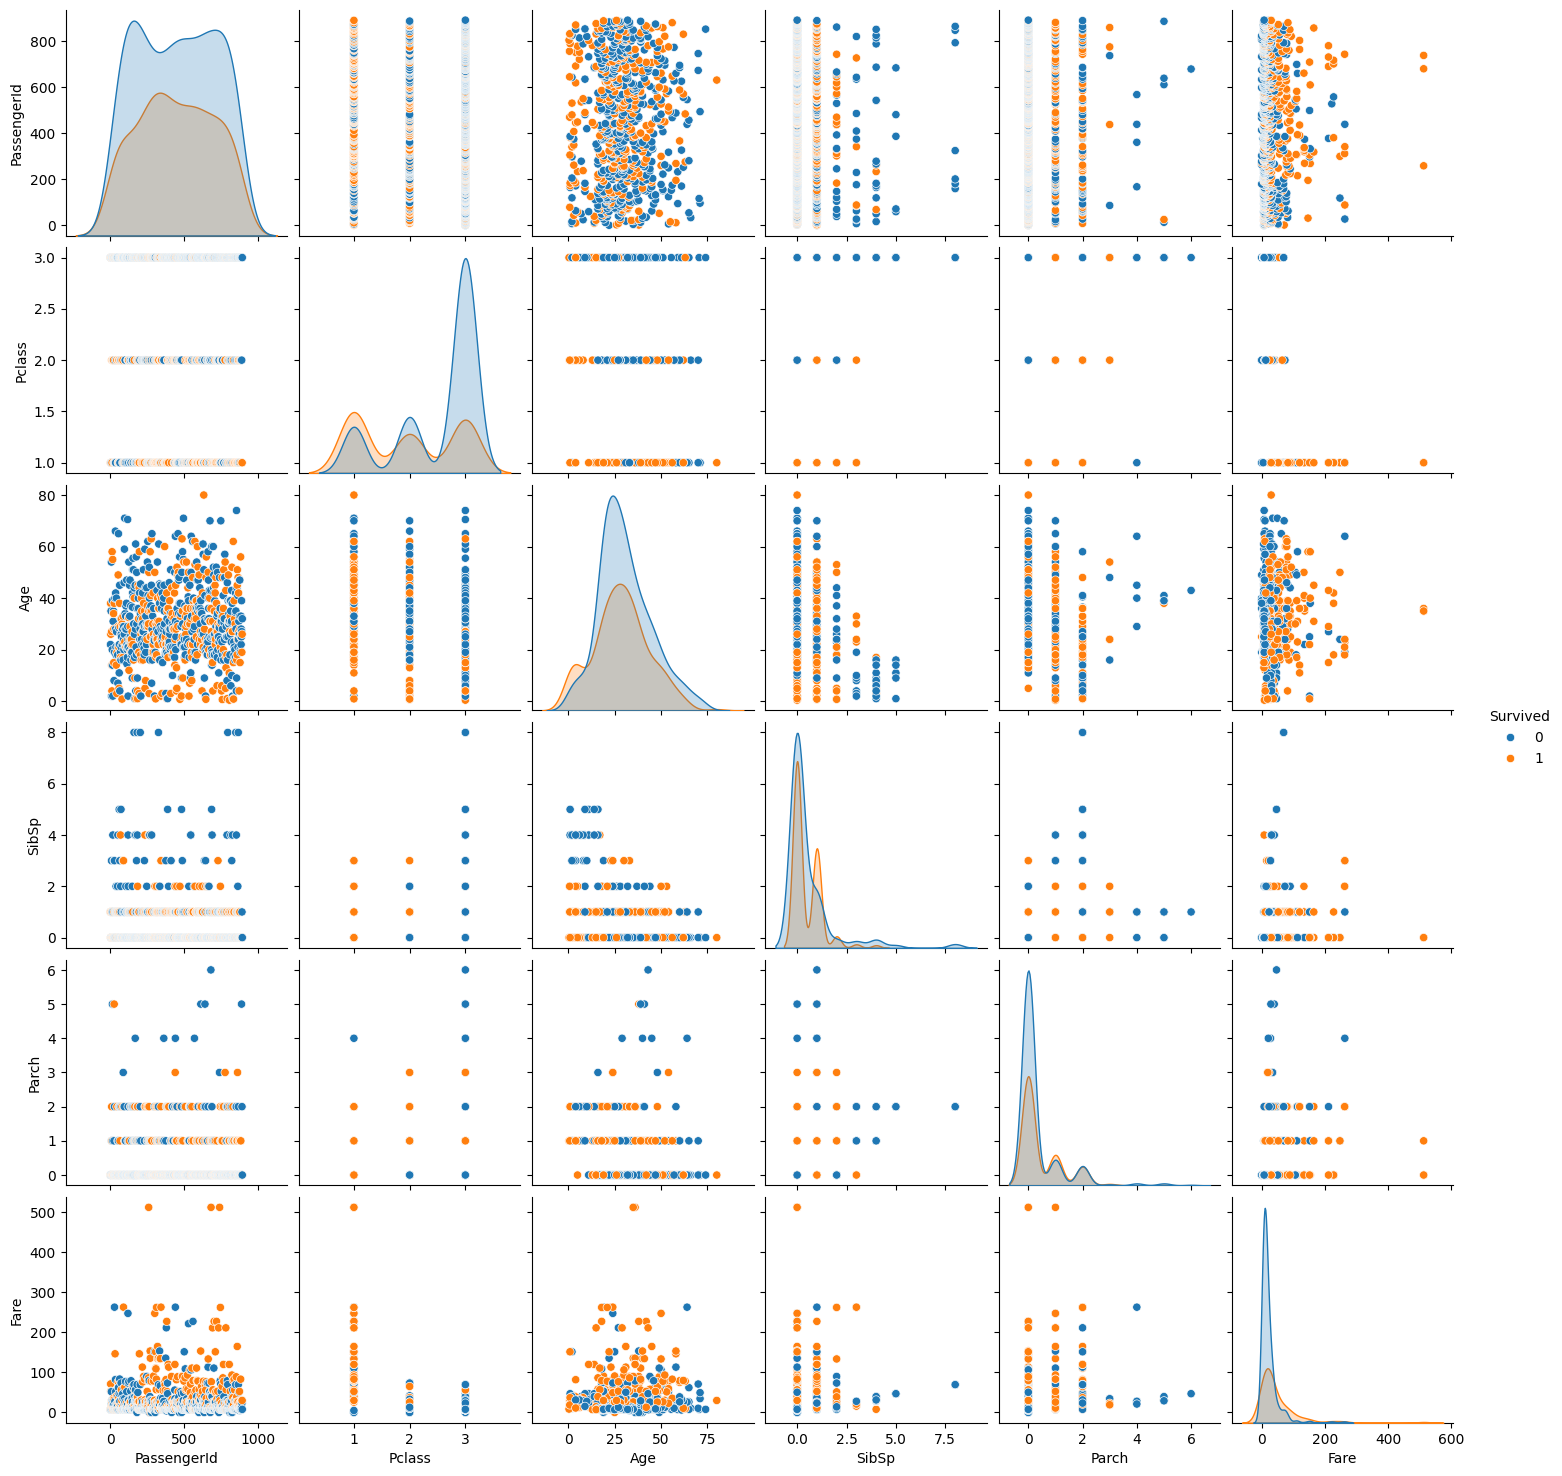

In [19]:
sns.pairplot(df_data,hue='Survived')
plt.show()

<Figure size 800x400 with 0 Axes>

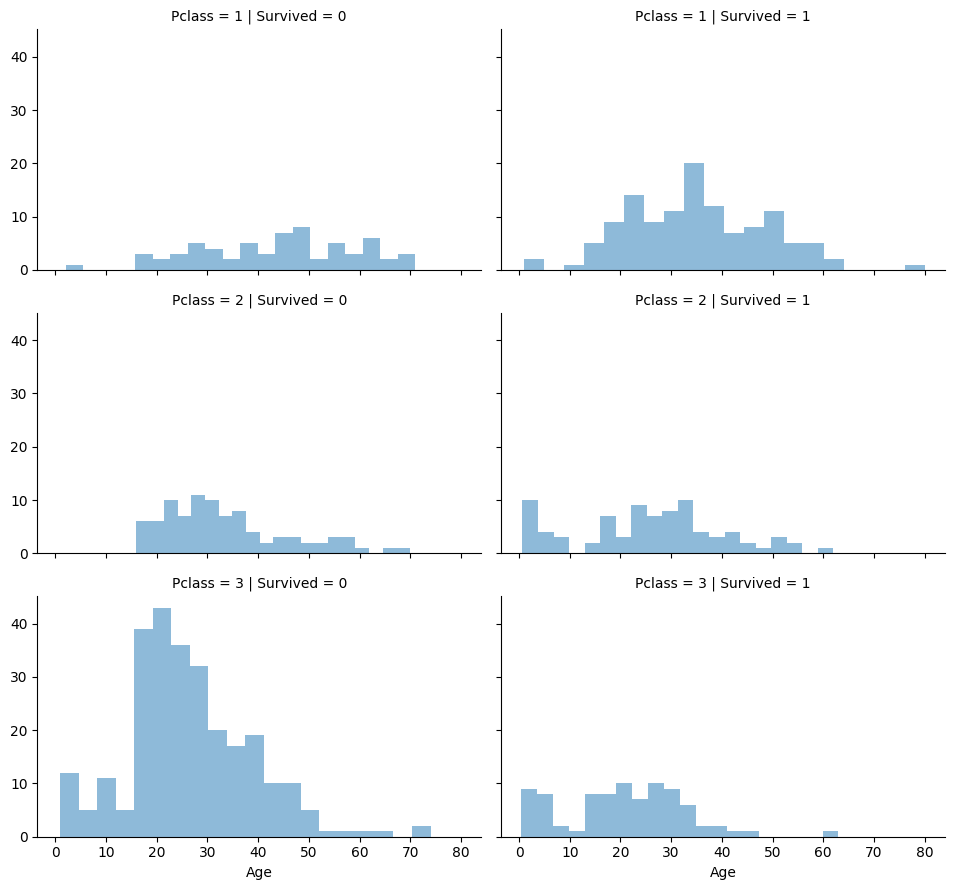

In [20]:
plt.figure(figsize=(8,4))
grid = sns.FacetGrid(df_data, col='Survived', row='Pclass',  aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()
plt.show();

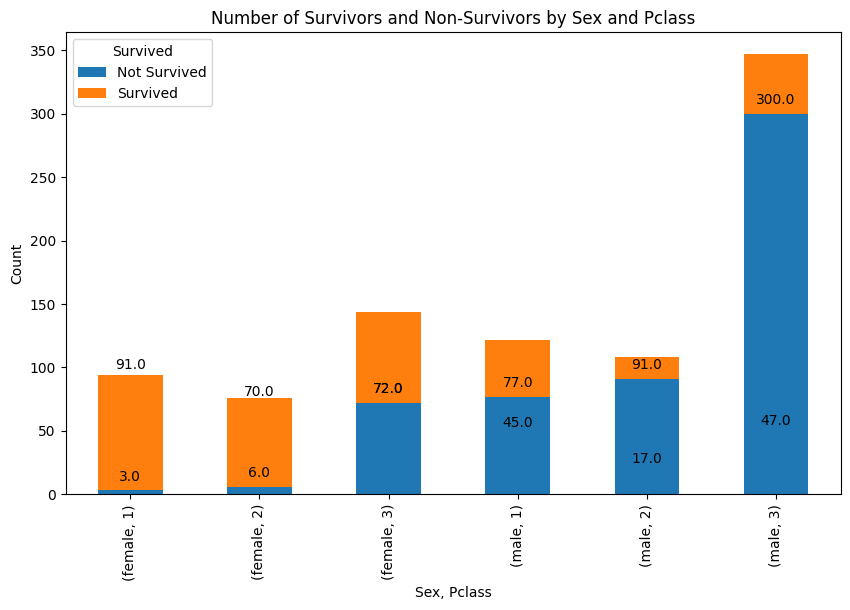

In [21]:
survival_counts = df_data.groupby(['Sex', 'Pclass', 'Survived']).size().unstack()

# Plot the data
ax = survival_counts.plot(kind='bar', stacked=True, figsize=(10, 6))

# Add count labels on top of each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.xlabel('Sex, Pclass')
plt.ylabel('Count')
plt.title('Number of Survivors and Non-Survivors by Sex and Pclass')
plt.legend(title='Survived', labels=['Not Survived', 'Survived'])
plt.show()


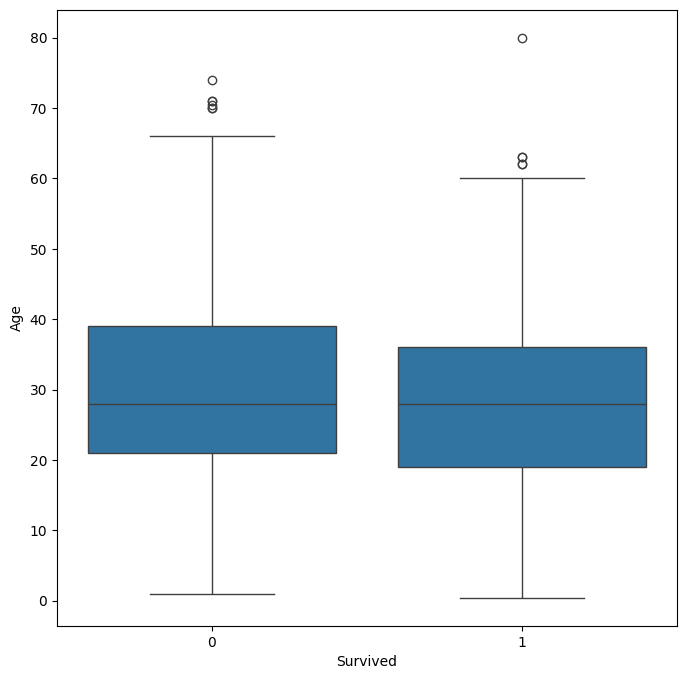

In [22]:
plt.figure(figsize=(8,8))
sns.boxplot(x="Survived", y="Age", data=df_data)
plt.show()

# Data Preprocessing

In [23]:
df_data.duplicated().sum() #remove the duplicate values

0

In [24]:
df_data.isna().sum() #Find the columns has null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In the Age column, there are 177 empty rows, need to remove or add the value to the rows. Here we can add the values to the rows by mean of all the age rows.

In [25]:
df_data['Age'].fillna(df_data['Age'].mean(),inplace=True)

In [26]:
df_data['Age'].isna().sum()

0

In the Embarked we use mode due to the most occuring value is better in NA values.

In [27]:
print(df_data['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [28]:
df_data['Embarked'].fillna(df_data['Embarked'].mode()[0], inplace=True)

In [29]:
df_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [30]:
df_data = df_data.drop(['PassengerId'], axis=1) #no need for PassengerID

In [31]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


Above you can see that ‘Fare’ is a float and we have to deal with 4 categorical features: Name, Sex, Ticket and Embarked. Lets investigate and transfrom one after another.

In [32]:
df_data['Fare']=df_data['Fare'].astype(int)
df_data['Fare'].dtype

dtype('int64')

In [33]:
df_data = df_data.drop(columns = ['Name','Ticket','Cabin'],axis=1) #Not use full features

In [34]:
genders = {"male": 0, "female": 1}
df_data['Sex']=df_data['Sex'].map(genders)
ports = {"S": 0, "C": 1, "Q": 2}
df_data['Embarked']=df_data['Embarked'].map(ports)

# label_encoder = LabelEncoder()
# df['Sex'] = label_encoder.fit_transform(df['Sex'])
# df['Embarked'] = label_encoder.fit_transform(df['Embarked'])

In [35]:
df_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7,0
1,1,1,1,38.0,1,0,71,1
2,1,3,1,26.0,0,0,7,0
3,1,1,1,35.0,1,0,53,0
4,0,3,0,35.0,0,0,8,0


In [36]:
corrcolumns = df_data
corrcolumns.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,0.543351,-0.069809,-0.035322,0.081629,0.257482,0.106811
Pclass,-0.338481,1.000000,-0.131900,-0.331339,0.083081,0.018443,-0.550553,0.045702
Sex,0.543351,-0.131900,1.000000,-0.084153,0.114631,0.245489,0.182331,0.116569
Age,-0.069809,-0.331339,-0.084153,1.000000,-0.232625,-0.179191,0.091773,0.007461
SibSp,-0.035322,0.083081,0.114631,-0.232625,1.000000,0.414838,0.159506,-0.059961
Parch,0.081629,0.018443,0.245489,-0.179191,0.414838,1.000000,0.216252,-0.078665
Fare,0.257482,-0.550553,0.182331,0.091773,0.159506,0.216252,1.000000,0.061061
Embarked,0.106811,0.045702,0.116569,0.007461,-0.059961,-0.078665,0.061061,1.000000


<Axes: >

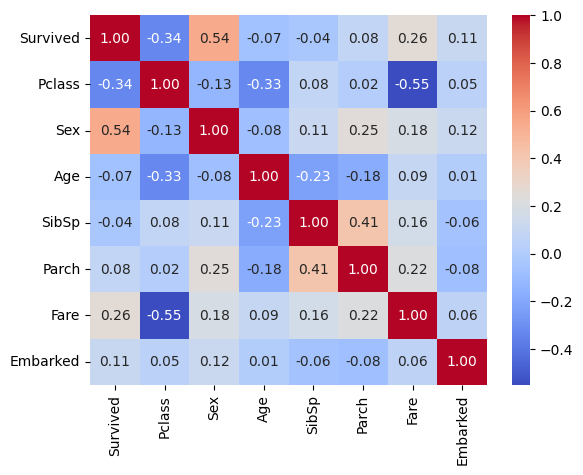

In [37]:
sns.heatmap(corrcolumns.corr(), annot=True, cmap='coolwarm', fmt=".2f")

# Model Building

Now we can try several machine learning models and compare the results to find the best fit.

In [38]:
X = df_data.drop(columns='Survived',axis=1)
Y = df_data['Survived']

In [39]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [40]:
X_train,x_test,Y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [56]:
#Logistic Regression

logreg=LogisticRegression()

logreg.fit(X_train,Y_train)

Y_pred = logreg.predict(x_test)

acc_log=round(logreg.score(X_train,Y_train)*100,2)

In [42]:
#Stochastic Gradient Descent (SGD)
sgd=linear_model.SGDClassifier(max_iter=5,tol=None)

sgd.fit(X_train,Y_train)

Y_pred=sgd.predict(x_test)

sgd.score(X_train,Y_train)
acc_sgd = round(sgd.score(X_train,Y_train)*100,2)

In [43]:
#Random Forest

random_forest=RandomForestClassifier(n_estimators=100)

random_forest.fit(X_train,Y_train)

Y_pred = random_forest.predict(x_test)

random_forest.score(X_train,Y_train)

acc_rf = round(random_forest.score(X_train,Y_train)*100,2)

In [47]:
# KNN
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(x_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)

In [49]:
#Naive bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(x_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)

In [52]:
#SVM
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)

Y_pred = linear_svc.predict(x_test)

acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [54]:
#Decicion Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(x_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)


In [60]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression',
              'Random Forest', 'Naive Bayes',
              'Stochastic Gradient Decent',
              'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log,
              acc_rf, acc_gaussian,
              acc_sgd, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
96.35,Random Forest
96.35,Decision Tree
83.57,KNN
80.20,Logistic Regression
80.20,Naive Bayes
77.39,Support Vector Machines
62.36,Stochastic Gradient Decent


Random Forest has the highest accuracy compare to the other models. So, let we use the K fold classification , which splits the dataset into k subsets and modeling is done based on the k.

In [61]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, Y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.80555556 0.80555556 0.74647887 0.8028169  0.81690141 0.73239437
 0.81690141 0.76056338 0.74647887 0.85915493]
Mean: 0.7892801251956183
Standard Deviation: 0.03853040071822261


Our model with Cross Validation techniques, we have more realistic of accuracy mean of 78% . Standard deviation is 3% which is model +-4% accuracy.